# Titanic - Análise de dados

Este projeto tem como objetivo tratar e analisar dados de passageiros do titanic para criar um algoritmo preditivo que estime a probabilidade de sobrevivência de um passageiro. O processo é composto das seguintes etapas:

1. Importação e tratamento inicial dos dados
2. Análise exploratória dos dados
3. Análise quantitativa dos dados
4. Elaboração do algoritmo preditivo
5. Avaliação da eficácia do modelo
6. Exportação dos dados para planilha Excel

### Ferramentas utilizadas

![Python](https://img.shields.io/badge/-Python-333333?style=for-the-badge&logo=Python)
![Pandas](https://img.shields.io/badge/-Pandas-333333?style=for-the-badge&logo=pandas)
![Jupyter](https://img.shields.io/badge/-Jupyter-333333?style=for-the-badge&logo=jupyter)
![Excel](https://img.shields.io/badge/-Excel-333333?style=for-the-badge&logo=microsoftexcel)

## Etapa 1:
Esta etapa consiste em:
- Importar os dados da planilha
- Remover entidades com valores vazios


In [73]:
import pandas as pd 
df = pd.read_csv("train.csv")
display(df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
df.drop("Cabin", inplace=True, axis=1)
df = df.dropna()
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Etapa 2:
- Antes de iniciar a análise da correlação entre cada variável e a sobrevivência ou não do passageiro, é necessário se certificar de que todas a variáveis são relevantes para a observação

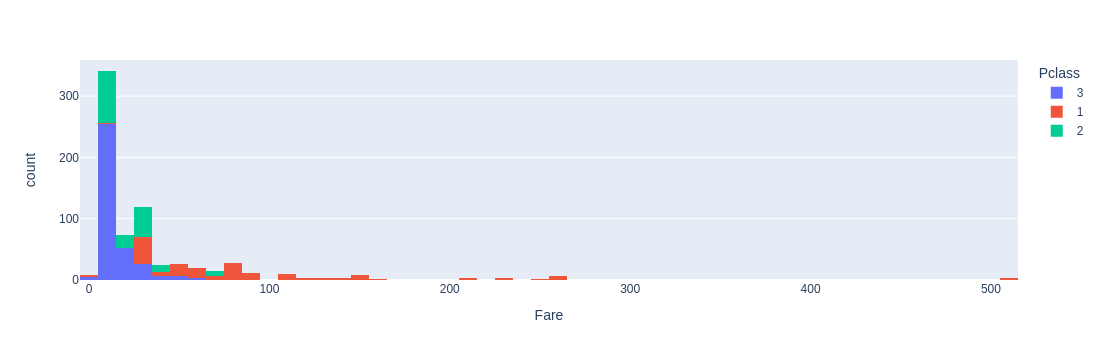

In [75]:
for coluna in df:
    if coluna == "Fare":
        fig = px.histogram(df, x=coluna, color="Pclass")
        fig.show()
    

- Analisando o histograma que compara as colunas "Fare"(Tarifa) e "Pclass"(classe do passageiro), fica evidente que as duas possuem forte correlação, ou seja, a partir da tarifa é possível determinar quase com certeza qual a classe do passageiro e vice-versa
- Em vista disso, é possível afirmar que as duas variáveis medem a mesma coisa
- Portanto, considerar as duas variáveis na análise é prejudicial pois o mesmo fator seria levado em conta duas vezes
- Optaremos por desconsiderar a variável "Fare"(Tarifa)

- O primeiro passo da análise exploratória é exibir os dados em gráficos e identificar visualmente as correlações.

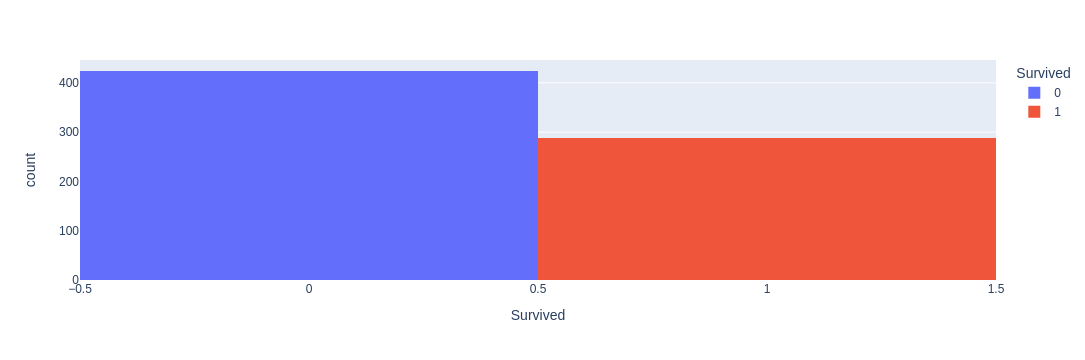

Survived,0,1
Survived,,
0,NaN,NaN
1,NaN,NaN


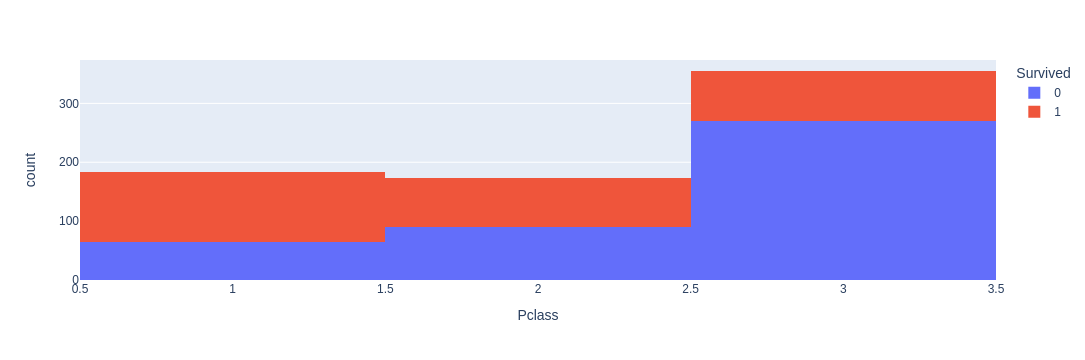

Pclass,1,2,3
Survived,,,
0,34.782609,52.023121,76.056338
1,65.217391,47.976879,23.943662


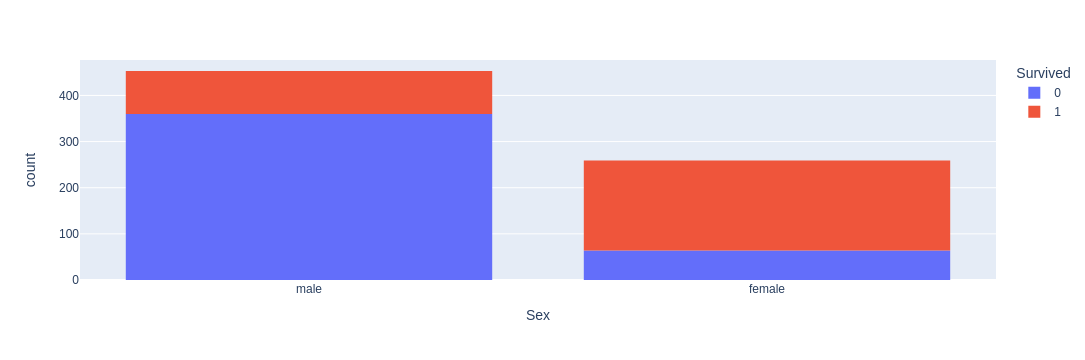

Sex,female,male
Survived,,
0,24.710425,79.470199
1,75.289575,20.529801


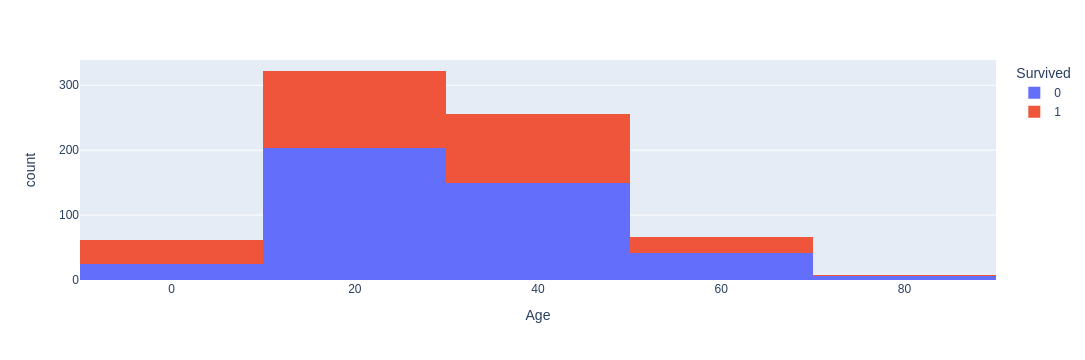

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,28.571429,70.0,16.666667,30.0,NaN,...,66.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,71.428571,30.0,83.333333,70.0,NaN,...,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


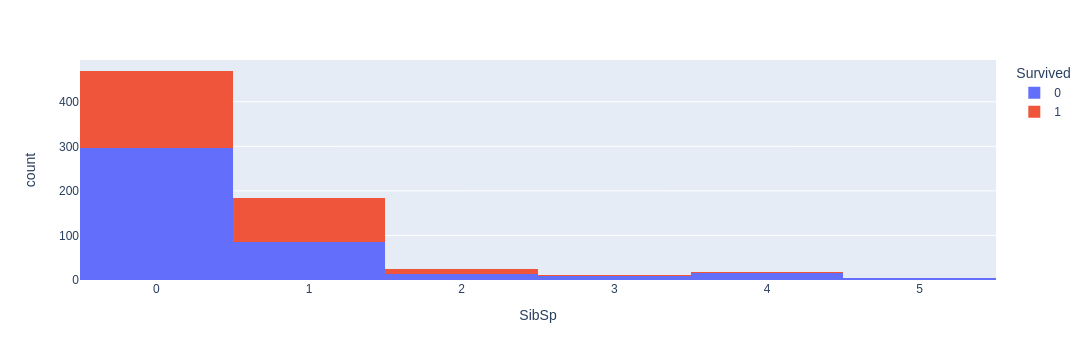

SibSp,0,1,2,3,4,5
Survived,,,,,,
0,63.113006,46.994536,56.0,66.666667,83.333333,NaN
1,36.886994,53.005464,44.0,33.333333,16.666667,NaN


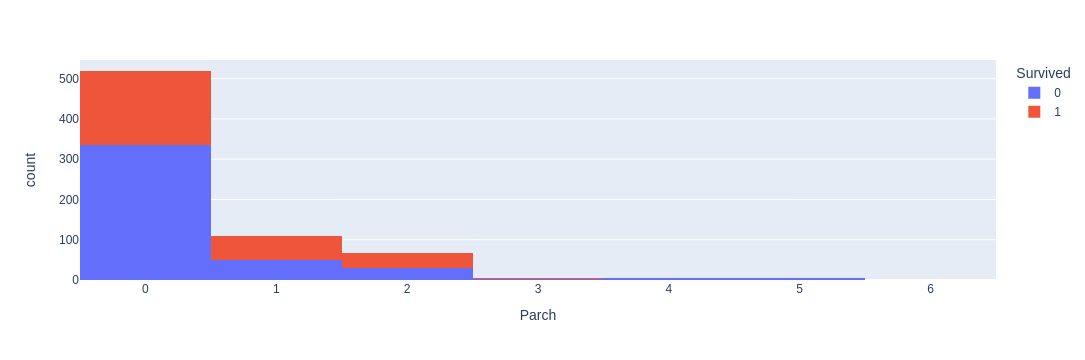

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,64.547206,44.545455,42.647059,40.0,NaN,80.0,NaN
1,35.452794,55.454545,57.352941,60.0,NaN,20.0,NaN


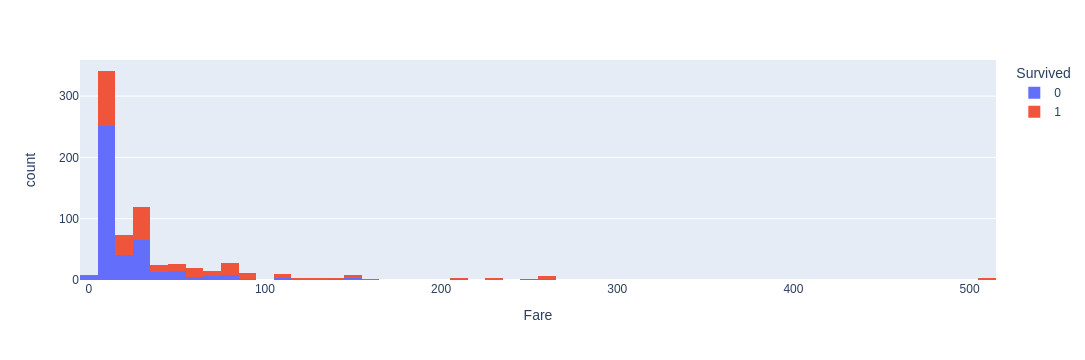

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.9750,7.0458,...,151.5500,153.4625,164.8667,211.3375,211.5000,227.5250,247.5208,262.3750,263.0000,512.3292
Survived,,,,,,,,,,,,,,,,,,,,,
0,85.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,...,50.0,33.333333,NaN,NaN,NaN,NaN,50.0,NaN,50.0,NaN
1,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,...,50.0,66.666667,NaN,NaN,NaN,NaN,50.0,NaN,50.0,NaN


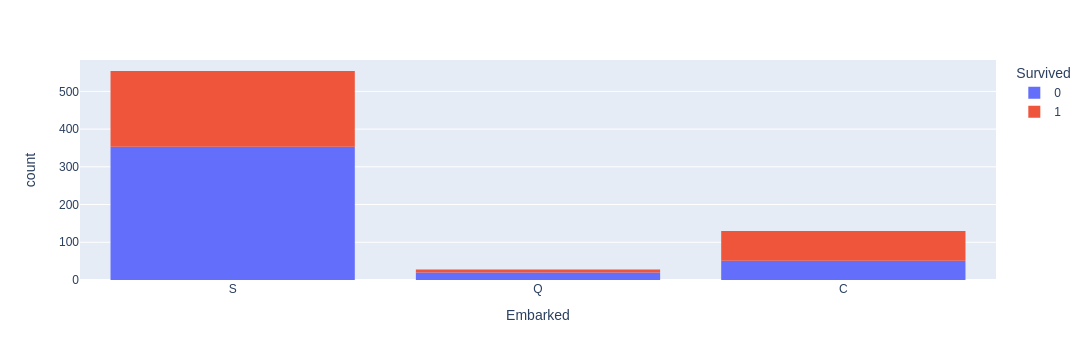

Embarked,C,Q,S
Survived,,,
0,39.230769,71.428571,63.718412
1,60.769231,28.571429,36.281588


In [76]:
import plotly.express as px

# para edições nos gráficos: https://plotly.com/python/histograms/

for coluna in df:
    if coluna != "PassengerId" and coluna!="Name" and coluna !="Ticket":
        # criar a figura
        if coluna == "Age":
            fig = px.histogram(df, x=coluna, color="Survived", nbins=4)
        # exibir a figura
        else:
            fig = px.histogram(df, x=coluna, color="Survived")
        # exibir a figura
        fig.show()
        display(df.pivot_table(index="Survived", columns=coluna, aggfunc='count').apply(lambda x: x*100/sum(x))["PassengerId"])

- Analisando os gráficos, ficam evidentes as seguintes tendencias:
  
| Código | Descrição                                           |
| :----- | :-------------------------------------------------- |
| `Classe`    | Os passageiros de classes mais altas têm tendência muito maior de sobrevivência.|
| `Gênero`    | A taxa de sobrevivência das mulheres é muito maior que a dos homens.    |
| `Idade`    | As crianças com menos de 10 anos tem alta taxa de sobrevivência, os adultos têm uma taxa media de 40%, a partir dos 50 a taxa tem uma forte tendência de diminuição.  |
| `Familiares`    | Os passageiros que viajavam junto com familiares tiveram uma taxa de sobrevivência menor             |
| `Porto`    | Os passageiros que embarcaram no porto de Cherbourg tiveram uma taxa de sobreviência relativamente maior do que a dos passageiros que embarcaram em Southampton e Queenstown.|


## Etapa 3:
- Agora, é necessário analisar numericamentes as correlações indicadas no item anterior

In [77]:
for coluna in df:
    if coluna != "PassengerId" and coluna!="Name" and coluna !="Ticket":
        display(df.pivot_table(index="Survived", columns=coluna, aggfunc='count').apply(lambda x: x*100/sum(x))["PassengerId"])

Survived,0,1
Survived,,
0,NaN,NaN
1,NaN,NaN


Pclass,1,2,3
Survived,,,
0,34.782609,52.023121,76.056338
1,65.217391,47.976879,23.943662


Sex,female,male
Survived,,
0,24.710425,79.470199
1,75.289575,20.529801


Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,28.571429,70.0,16.666667,30.0,NaN,...,66.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,71.428571,30.0,83.333333,70.0,NaN,...,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


SibSp,0,1,2,3,4,5
Survived,,,,,,
0,63.113006,46.994536,56.0,66.666667,83.333333,NaN
1,36.886994,53.005464,44.0,33.333333,16.666667,NaN


Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,64.547206,44.545455,42.647059,40.0,NaN,80.0,NaN
1,35.452794,55.454545,57.352941,60.0,NaN,20.0,NaN


Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.9750,7.0458,...,151.5500,153.4625,164.8667,211.3375,211.5000,227.5250,247.5208,262.3750,263.0000,512.3292
Survived,,,,,,,,,,,,,,,,,,,,,
0,85.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,...,50.0,33.333333,NaN,NaN,NaN,NaN,50.0,NaN,50.0,NaN
1,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,...,50.0,66.666667,NaN,NaN,NaN,NaN,50.0,NaN,50.0,NaN


Embarked,C,Q,S
Survived,,,
0,39.230769,71.428571,63.718412
1,60.769231,28.571429,36.281588


#### Os gráficos acima indicam as seguintes Probabilidades de sobrevivência
##### Classe
| Classe | Probabilidade                                          |
| :----- | :-------------------------------------------------- |
| `1°`    | 65.21%                               |
| `2°`    | 47.97%   |
| `3°`    | 23.94%  |

##### Gênero
| Gênero | Probabilidade                                          |
| :----- | :-------------------------------------------------- |
| `Feminino`    | 75.21%                               |
| `Masculino`    | 20.52%   |

##### Idade
| Idade | Probabilidade                                          |
| :----- | :-------------------------------------------------- |
| `0-9`    | 61.29%                               |
| `10-29`    | 36.64%   |
| `30-49`    | 41.56%   |
| `50-69`    | 37.87%   |
| `70+`    | 14.28%   |

##### Cônjuges/irmãos a bordo(SibSp)
| Irmãos/Cônjuges | Probabilidade                                          |
| :----- | :-------------------------------------------------- |
| `0`    | 36.88%                               |
| `1`    | 53%   |
| `2`    | 44%   |
| `3`    | 33.33%   |
| `4`    | 16.66%   |
| `5+`    | 0%   |
 
##### Pais ou filhos a bordo(parch)
| Pais/Filhos | Probabilidade                                          |
| :----- | :-------------------------------------------------- |
| `0`    | 35.45%                               |
| `1`    | 55.45%   |
| `2`    | 57.35%   |
| `3`    | 60%   |
| `4`    | 0%   |
| `5`    | 20%   |
| `6+`    | 0%   |

##### Porto de Embarque
| Porto de embarque | Probabilidade                                          |
| :----- | :-------------------------------------------------- |
| `Chesterbourg`    | 60.76%                               |
| `Queenstown`    | 28.57%   |
| `Southampton`    | 36.28%   |



## Etapa 4:
- O algoritmo preditivo irá utilizar os dados de cada passageiro para avaliar sua possibilidade de sobrevivência em relação a cada variável
- Depois, o algoritmo calculará a média entre as probabilidades de sobrevivência, caso esta média seja maior que 50%, a previsão será de sobrevivência do passageiro
- Tanto a possibilidade de sobrevivência quanto a previsão serão adicionadas à tabela

In [78]:
classe = [65.21,47.97,23.94]
genero = [75.21,20.52]
idade = [61.29,36.64,41.56,37.87,14.28]
conjirm = [36.88,53,44,33.33,16.66,0]
paifilho = [35.45,55.45,57.35,60,0,20,0]
porto = {"C":60.76,	"Q":28.57,	"S":36.28}

def calculaProbabilidade(Pclass,Sex,Age,SibSP,Parch,Embarked):
    if SibSP>5:
        SibSP=5
    if Parch>6:
        parch =6
    if(Age<10):
        probage = idade[0]
    elif(Age<30):
        probage = idade[1]
    elif(Age<50):
        probage = idade[2]
    elif(Age<70):
        probage = idade[3]
    else:
        probage = idade[0]
    if Sex == "female":
        probsex = genero[0]
    else:
        probsex = genero[1]
    prob = (classe[Pclass-1]+probsex+probage+conjirm[SibSP]+paifilho[Parch]+porto[Embarked])/6
    return prob

In [79]:
df["Prediction"]=0
df["Probability"]=0
for ind in df.index:
    resultado = calculaProbabilidade(df["Pclass"][ind],df["Sex"][ind],df["Age"][ind],df["SibSp"][ind],df["Parch"][ind],df["Embarked"][ind])
    if resultado>50:
        df["Prediction"][ind]=1
    df["Probability"][ind] = resultado
    
display(df)

/tmp/ipykernel_14063/2138246176.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_14063/2138246176.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '34.305' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/tmp/ipykernel_14063/2138246176.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_14063/2138246176.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prediction,Probability
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,34.305000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,55.198333
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,40.733333
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,51.118333
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,32.438333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,37.693333
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,35.623333
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,47.611667
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,42.576667


## Etapa 5:
- Primeiro vamos exibir os dados obtidos

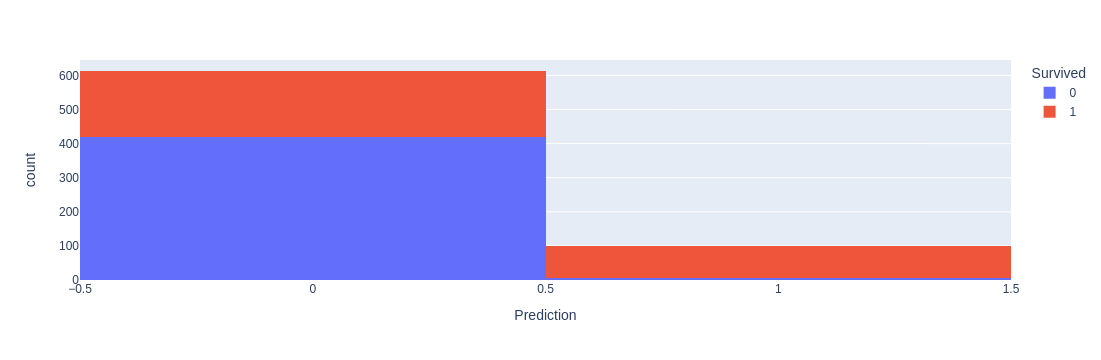

In [80]:
fig = px.histogram(df, x="Prediction", color="Survived")
fig.show()

In [81]:
display(df.pivot_table(index="Survived", columns="Prediction", aggfunc='count').apply(lambda x: x*100/sum(x))["PassengerId"])

Prediction,0,1
Survived,,
0,68.352365,5.050505
1,31.647635,94.949495


- Analisando os dados, vemos que a precisão do algoritmo é superior a 70%
- Vemos também que ao indicar a sobrevivência em vez da não sobrevivência, o algoritmo apresenta precisão de 94.94%
- Isso que quer dizer que o algoritmo sacrifica a precisão do julgamento nos casos prevẽ a não sobrevivência, em nome de um alto desempenho ao prever a sobrevivência dos passageiros com quase 95% de precisão

## Etapa 6:
- A última etapa do processo é utilizar o algoritmo para prever a sobrevicência de passageiros da base de dados desejada
- Os resultados, então, serão exportados para uma planilha Excel

In [82]:
import pandas as pd 
dfteste = pd.read_csv("test.csv")
dfteste.drop("Cabin", inplace=True, axis=1)
dfteste = dfteste.dropna()
display(dfteste)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C


In [83]:
dfteste["Prediction"]=0
dfteste["Probability"] = 0
for ind in dfteste.index:
    resultado = calculaProbabilidade(dfteste["Pclass"][ind],dfteste["Sex"][ind],dfteste["Age"][ind],dfteste["SibSp"][ind],dfteste["Parch"][ind],dfteste["Embarked"][ind])
    if resultado>50:
        dfteste["Prediction"][ind]=1
    dfteste["Probability"][ind] = resultado    
    
    
display(df)


/tmp/ipykernel_14063/3387169597.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_14063/3387169597.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '31.153333333333336' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/tmp/ipykernel_14063/3387169597.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_14063/3387169597.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prediction,Probability
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,34.305000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,55.198333
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,40.733333
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,51.118333
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,32.438333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,37.693333
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,35.623333
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,47.611667
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,42.576667


In [84]:
dfteste.to_excel("estimativas.xlsx", index=False)

## Recapitulando...
Os passos executados no projeto foram:
1. Importar a base de dados
2. Tratar os dados recebidos
3. Analisar de maneira exploratória os dados
4. Calcular a correlação entre cada uma das variáveis e a sobrevivência do passageiro
5. Desenvolver implementar um algoritmo preditivo
6. Analisar a eficácia deste algoritmo
7. Exportar os dados para Excel